In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt 
import pandas as pd
from mlxtend.plotting import plot_decision_regions
'''IRIS datasets
# 0. sepal length in cm 
# 1. sepal width in cm 
# 2. petal length in cm 
# 3. petal width in cm 
# 4. class: 
# -- Iris Setosa 
# -- Iris Versicolour 
# -- Iris Virginica'''

'IRIS datasets\n# 0. sepal length in cm \n# 1. sepal width in cm \n# 2. petal length in cm \n# 3. petal width in cm \n# 4. class: \n# -- Iris Setosa \n# -- Iris Versicolour \n# -- Iris Virginica'

In [2]:
iris=datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = pd.Series(iris.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [0]:
X=df.iloc[:,[1,3]]
y=df.iloc[:,-1]

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [0]:
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [0]:
clf=KNeighborsClassifier(15,weights='uniform')
clf.fit(X_train_std,y_train)
y_pred=clf.predict(X_test_std)

In [7]:
C_M=confusion_matrix(y_test,y_pred)
print(C_M)

[[17  0  0]
 [ 0 14  0]
 [ 0  2 12]]


In [8]:
C_R=classification_report(y_test,y_pred)
print(C_R)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.88      1.00      0.93        14
           2       1.00      0.86      0.92        14

   micro avg       0.96      0.96      0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



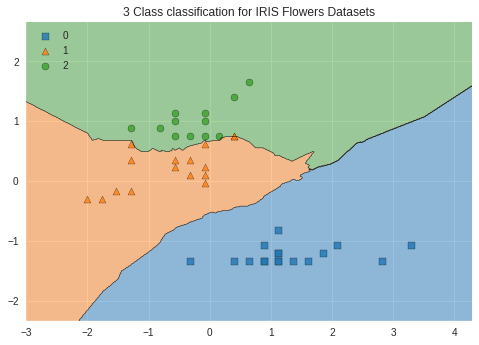

In [9]:
plot_decision_regions(X_test_std,y_pred,clf=clf,res=0.02,legend=2)
plt.title('3 Class classification for IRIS Flowers Datasets')
plt.show()